# This notebook is to determine the metadata of the subjects used for the critical genes + DEGs co-expression correlation

In [1]:
import sys
sys.path.append("../..")
import pandas as pd
import numpy as np
import seaborn as sns
from src.preproc.load_gtex import *
from sys import platform
prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
sample_meta = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/GTEx/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt', sep = '\t')
subject_meta = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/GTEx/GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.txt', sep = '\t')

In [3]:
fc_samples = sample_meta[sample_meta['SMTSD'] == 'Brain - Frontal Cortex (BA9)'] # Get only the FC samples
fc_samples = fc_samples.assign(SUBJID = fc_samples['SAMPID'].apply(lambda x:'-'.join(x.split('-')[:2]))) # Convert sample name to subject name
fc_annotated = pd.merge(fc_samples, subject_meta, left_on = 'SUBJID', right_on ='SUBJID')

In [4]:
# load gtex data for critical genes + DEGs
gtex_cg = clean_gtex(prefix + '/Shared drives/NIAAA_ASSIST/Data/GTEx_v8_traits.csv')

In [5]:
gtex_cg.Symbol = gtex_cg.Symbol.str.replace('v8','')

In [6]:
# index for subjects with expression data
expressed_index = gtex_cg.isna().sum(axis = 1)[gtex_cg.isna().sum(axis =1) == 0].index

In [7]:
print('# of subjects used for cg correlation')
print(len(gtex_cg.loc[expressed_index].Symbol))

# of subjects used for cg correlation
209


In [8]:
print('# of subjects used for cg correlation were in the GTEX v8 frontal cortex samples')
len(set(fc_annotated['SUBJID']).intersection(set(gtex_cg.loc[expressed_index].Symbol)))

# of subjects used for cg correlation were in the GTEX v8 frontal cortex samples


209

In [9]:
# filter metadata by the subjects used for CG and DEGs
used_subject_meta = subject_meta[subject_meta['SUBJID'].isin(gtex_cg.loc[expressed_index].Symbol.unique())]

In [10]:
used_subject_meta.sort_values('AGE', inplace = True)

<ipython-input-10-35a023bf6059>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_subject_meta.sort_values('AGE', inplace = True)


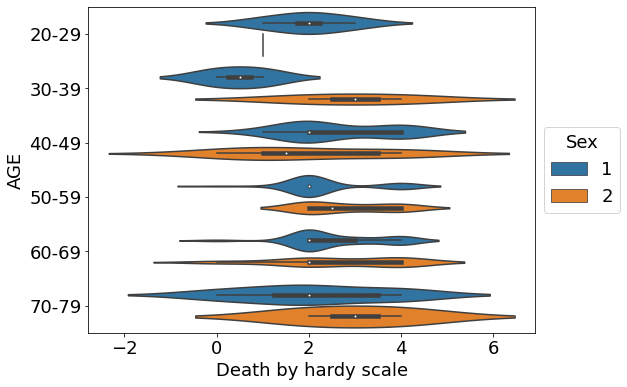

In [19]:
plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size':18})
g = sns.violinplot(x = 'DTHHRDY', y = 'AGE', data = used_subject_meta, hue = 'SEX')
plt.xlabel('Death by hardy scale')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.legend_.set_title('Sex')